In [14]:
!pip install gdal
!pip install rasterio
!pip install spectral

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 KB 4.4 MB/s eta 0:00:00


Biblioteca Tifffile

In [48]:
import tifffile as tif
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from spectral import imshow
from rasterio.plot import show

In [23]:
img = tif.imread('/content/L71221071_07120010720_DN.tif')

In [8]:
img.shape

(1233, 1520, 6)

1233 linhas, 1520 colunas, 6 bandas (img)

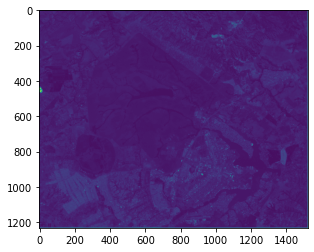

In [11]:
plt.imshow(img[:, :, 0])

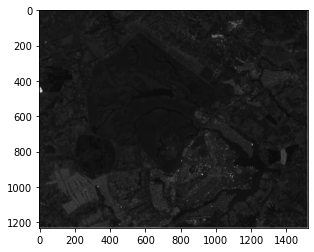

In [12]:
plt.imshow(img[:, :,0], cmap = 'Greys_r')

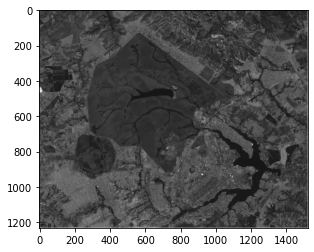

In [13]:
plt.imshow(img[:, :, 2], cmap = 'Greys_r')

ImageView object:
  Display bands       :  [0, 3.0, 5]
  Interpolation       :  <default>
  RGB data limits     :
    R: [40.0, 255.0]
    G: [12.0, 255.0]
    B: [1.0, 255.0]

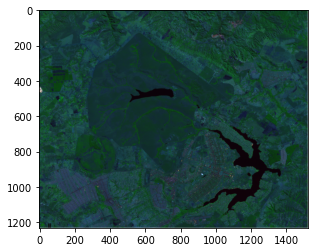

In [16]:
imshow(img)

ImageView object:
  Display bands       :  (2, 1, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [13.0, 255.0]
    B: [40.0, 255.0]

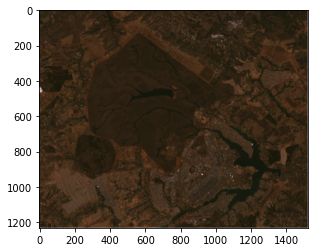

In [17]:
imshow(img, bands = (2, 1, 0))

ImageView object:
  Display bands       :  (0, 3, 5)
  Interpolation       :  <default>
  RGB data limits     :
    R: [40.0, 255.0]
    G: [12.0, 255.0]
    B: [1.0, 255.0]

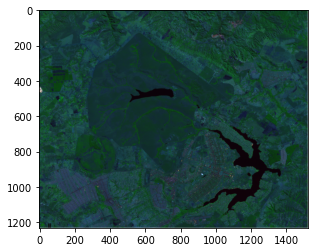

In [18]:
imshow(img, bands = (0, 3, 5))

GDAL

In [20]:
from osgeo import gdal

In [22]:
img2 = gdal.Open('/content/L71221071_07120010720_DN.tif')

In [24]:
img3 = img2.ReadAsArray()

In [25]:
img3.shape

(6, 1233, 1520)

In [31]:
img3 = img3.swapaxes(0,1)

In [32]:
img3.shape

(1233, 1520, 6)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [13.0, 255.0]
    B: [13.0, 255.0]

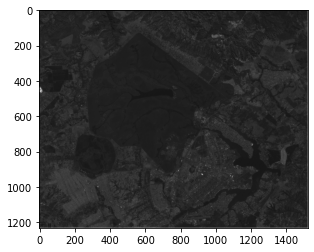

In [33]:
imshow(img3[:, :, 1])

ImageView object:
  Display bands       :  (2, 3, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [12.0, 255.0]
    B: [13.0, 255.0]

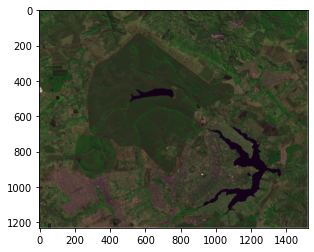

In [34]:
imshow(img3, (2,3,1))

In [35]:
b1 = img2.GetRasterBand(1).ReadAsArray()

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [40.0, 255.0]
    G: [40.0, 255.0]
    B: [40.0, 255.0]

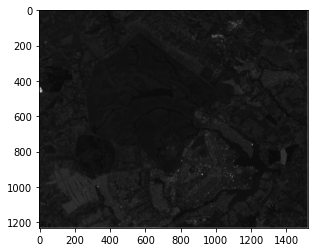

In [36]:
imshow(b1)

In [39]:
b1 = img2.GetRasterBand(1).ReadAsArray()
b2 = img2.GetRasterBand(2).ReadAsArray()
b4 = img2.GetRasterBand(4).ReadAsArray()

In [42]:
stack = np.dstack([b1, b2, b4])

In [43]:
stack.shape

(1233, 1520, 3)

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

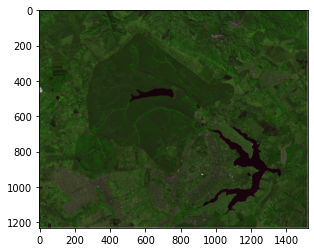

In [44]:
imshow(stack, (1, 2, 0))

Rasterio

In [49]:
rst = rasterio.open('/content/L71221071_07120010720_DN.tif')

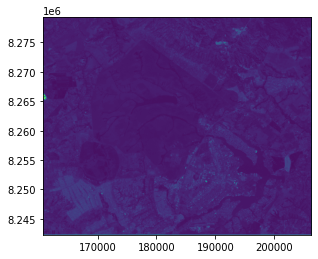

In [50]:
show(rst)

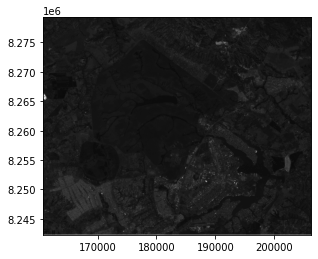

In [51]:
show(rst, cmap = 'Greys_r')

In [54]:
b1 = rst.read(1)
b2 = rst.read(2)
b4 = rst.read(4)

In [66]:
stack = np.dstack([b1, b2, b4])

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

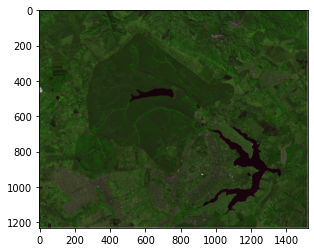

In [57]:
imshow(stack, (1, 2, 0))

In [67]:
with rasterio.open('/content/L71221071_07120010720_DN.tif') as rst:
  b1 = rst.read(1)
  b2 = rst.read(2)
  b4 = rst.read(4)

  stack2 = np.dstack([b1, b2, b4])

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

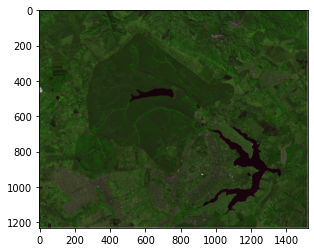

In [69]:
imshow(stack2, (1, 2, 0))